In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
# checkpoint_path = 'BEST_checkpoint_resnet101_NIC_coco_5_cap_per_img_5_min_word_freq.pth.tar'
checkpoint_path = 'BEST_checkpoint_resnet101_NICA_coco_5_cap_per_img_5_min_word_freq.pth.tar'

In [3]:
checkpoint = torch.load(checkpoint_path)
history = checkpoint['history']

# checkpoint2 = torch.load(checkpoint_path2)
# history2 = checkpoint2['history']

In [4]:
# for log in history:
#     print(log)
# history[-15:]

In [5]:
train_losses, train_accs = [], []
val_losses, val_accs, val_BLEU = [], [], []
for log in history:
    if log.startswith('Epoch:'):
        loss, acc = log.split('Loss ')[1].split('\tTop-5 Accuracy ')
        train_losses.append(float(loss.split()[0]))
        train_accs.append(float(acc.split()[0]))
    if log.startswith('\n * '):
        loss, left = log.split('\n * ')[1].split('LOSS - ')[1].split(', TOP-5 ACCURACY - ')
        acc, bleu = left.split(', BLEU-4 - ')
        bleu = bleu[:-1]
        val_losses.append(float(loss))
        val_accs.append(float(acc))
        val_BLEU.append(float(bleu))     
        
# train_losses2, train_accs2 = [], []
# val_losses2, val_accs2, val_BLEU2 = [], [], []
# for log in history2:
#     if log.startswith('Epoch:'):
#         loss, acc = log.split('Loss ')[1].split('\tTop-5 Accuracy ')
#         train_losses2.append(float(loss.split()[0]))
#         train_accs2.append(float(acc.split()[0]))
#     if log.startswith('\n * '):
#         loss, left = log.split('\n * ')[1].split('LOSS - ')[1].split(', TOP-5 ACCURACY - ')
#         acc, bleu = left.split(', BLEU-4 - ')
#         bleu = bleu[:-1]
#         val_losses2.append(float(loss))
#         val_accs2.append(float(acc))
#         val_BLEU2.append(float(bleu))                

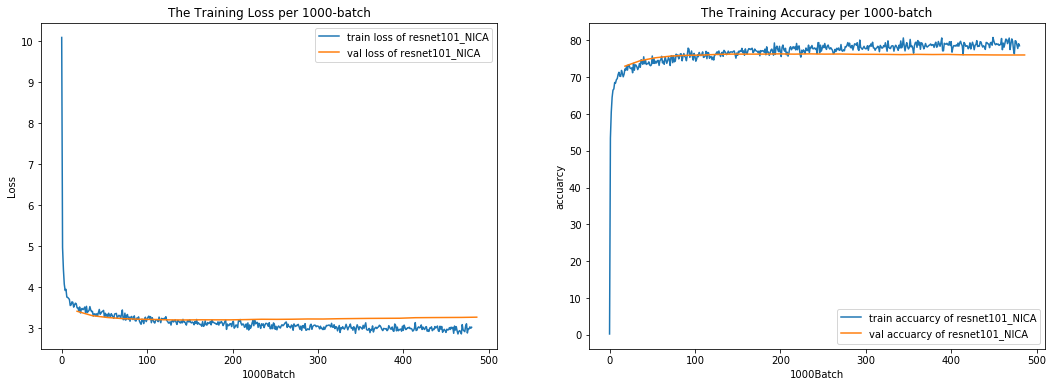

In [6]:
interval = 10
train_loss_batch = train_losses[0:1] + [ sum(train_losses[i*interval+1 :(i+1)*interval+1]) / \
                                        len(train_losses[i*interval+1 :(i+1)*interval+1]) \
                                           for i in range(len(train_losses)//interval)]
train_acc_batch = train_accs[0:1] + [ sum(train_accs[i*interval+1 :(i+1)*interval+1]) /\
                                     len(train_accs[i*interval+1 :(i+1)*interval+1]) \
                                           for i in range(len(train_accs)//interval)]
val_index = list(range(18, len(val_losses)*18+1,18))
final_batches = len(train_loss_batch)

# train_loss_batch2 = train_losses2[0:1] + [ sum(train_losses2[i*interval+1 :(i+1)*interval+1]) / \
#                                         len(train_losses2[i*interval+1 :(i+1)*interval+1]) \
#                                            for i in range(len(train_losses2)//interval)]
# train_acc_batch2 = train_accs2[0:1] + [ sum(train_accs2[i*interval+1 :(i+1)*interval+1]) /\
#                                      len(train_accs2[i*interval+1 :(i+1)*interval+1]) \
#                                            for i in range(len(train_accs2)//interval)]
# val_index2 = list(range(18, len(val_losses2)*18+1,18))
# final_batches2 = len(train_loss_batch2)




fig, axes = plt.subplots(ncols=2, figsize=(18, 6))

axes[0].plot(range(final_batches), train_loss_batch, label = 'train loss of resnet101_NICA')
axes[0].plot(val_index, val_losses, label = 'val loss of resnet101_NICA')
# axes[0].plot(range(final_batches2), train_loss_batch2, label = 'train loss of resnet101_NICA')
# axes[0].plot(val_index2, val_losses2, label = 'val loss of resnet101_NICA')
axes[0].set_xlabel('1000Batch') 
axes[0].set_ylabel('Loss')
axes[0].set_title('The Training Loss per 1000-batch')
axes[0].legend()

axes[1].plot(range(final_batches), train_acc_batch, label = 'train accuarcy of resnet101_NICA')
axes[1].plot(val_index, val_accs, label = 'val accuarcy of resnet101_NICA')
# axes[1].plot(range(final_batches2), train_acc_batch2, label = 'train accuarcy of resnet101_NICA')
# axes[1].plot(val_index2, val_accs2, label = 'val accuarcy of resnet101_NICA')
axes[1].set_xlabel('1000Batch') 
axes[1].set_ylabel('accuarcy')
axes[1].set_title('The Training Accuracy per 1000-batch')
axes[1].legend()

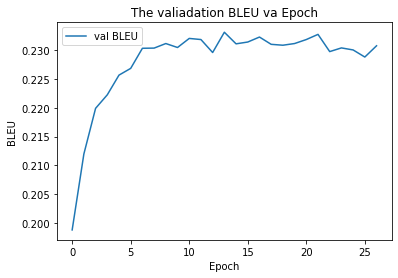

In [7]:
plt.plot(range(len(val_BLEU)), val_BLEU, label = 'val BLEU')
plt.xlabel('Epoch') 
plt.ylabel('BLEU')
plt.title('The valiadation BLEU va Epoch')
plt.legend()

In [28]:
# NIC
# (3.3192700000000004, 59.1669, 0.10548290731088139, 3.543, 57.16)
# NICA
# (3.0254999999999996, 78.55640000000001, 0.23073404573488, 3.271, 76.054)
train_loss_batch[-1], train_acc_batch[-1], val_BLEU[-1], val_losses[-1], val_accs[-1]

(3.3192700000000004, 59.1669, 0.10548290731088139, 3.543, 57.16)